# Homework 4 - Question 3 - Luke Arend

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
sns.set_style('darkgrid')

The Central Limit theorem states that the distribution of
the average of $n$ independent samples drawn from any fixed distribution with finite mean and
variance, gets closer and closer to a Normal (Gaussian) distribution as $n$ increases. Specifically, if the mean and variance of the original distribution are $µ$ and $σ$, the distribution of $\sqrt{n}(\bar{x} − µ)/σ$ converges to $\mathcal{N}(0, 1)$ as $n$ increases (where $\bar{x}$ is the average of $n$ samples).

# (a)

Generate 1,000 samples of two values each from a uniform distribution (use `rand`).

In [2]:
X = np.random.rand(1000, 2)

Compute the average of each sample (pair of values), and plot a histogram of these. What
shape is it, approximately? What shape should it have in the limit, as you gather more
and more samples (try with 100,000 samples)? Why?

In [3]:
def plot_random_uniforms(n):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    plt.suptitle(f'Average of {n} uniform random variables')
    X_avg = np.random.rand(1000, n).mean(axis=1)
    plt.sca(axs[0])
    sns.histplot(X_avg)
    plt.title('1000 samples')
    plt.xlabel('Sample value')
    plt.sca(axs[1])
    X_avg = np.random.rand(100000, n).mean(axis=1)
    sns.histplot(X_avg)
    plt.title('100000 samples')
    plt.xlabel('Sample value')
    plt.tight_layout()

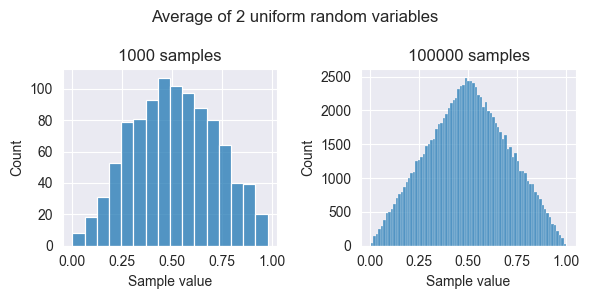

In [4]:
plot_random_uniforms(2)

The histogram for 1000 samples has the approximate shape of a triangle. In the limit it should converge to a perfect triangle centered on $0.5$. While the two samples' average can be anywhere between $0$ and $1$, it tends toward the center of the unit line since it must lie between both points. We can also see it by thinking combinatorically: there are many more pairings of samples that average to something around $0.5$ than pairings that average to values close to $0$ or $1$.

# (b)

Now try this again with samples containing 3 values. How has the histogram changed?

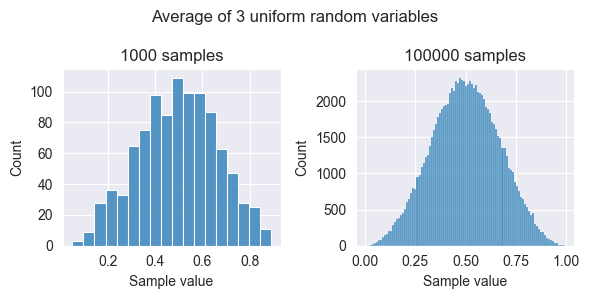

In [5]:
plot_random_uniforms(3)

Now the triangle has softened into something more like a bell curve.

Try sample sizes of 4 and 5 as well. When do you judge that the histogram starts looking
Normal?

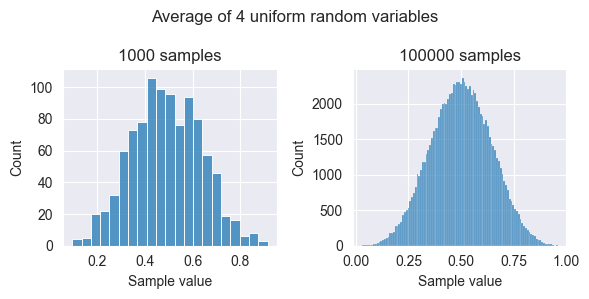

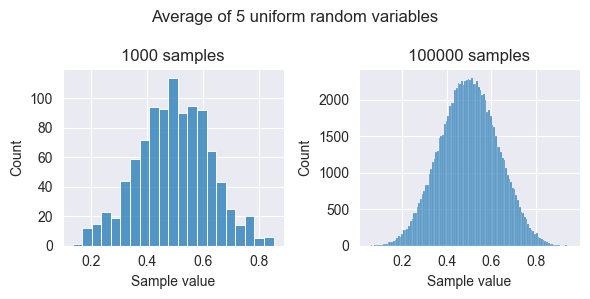

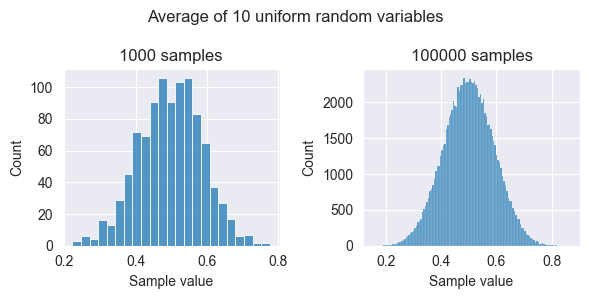

In [6]:
plot_random_uniforms(4)
plot_random_uniforms(5)
plot_random_uniforms(10)

In my estimation the histogram doesn't look that much more normal after we've hit n = **4 or 5**. So in this case it only takes a relatively small number of random variables before their average begins to look Gaussian.

# (c)

Test the Normality of the distribution a bit more carefully, using a “Q-Q” (quantile-quantile) plot (plot the quantiles of one distribution against another). If the two distributions match, the values should lie on a unit-slope line. For this problem, you can
use the matlab function `normplot`, which plots the quantiles of a sample of data against
those of a Normal distribution of the same mean and variance.

In [40]:
def normplot(samples, quantiles, title, xlabel=None, ylabel=None, linelabel=None):
    sample_quantiles = np.quantile(samples, q=quantiles)
    norm_dist = stats.norm(loc=np.mean(samples), scale=np.std(samples))
    true_quantiles = norm_dist.ppf(quantiles)
    if title:
        plt.title(title)
    linelabel = linelabel if linelabel else 'True quantiles'
    xlabel = xlabel if xlabel else 'True quantile value'
    ylabel = ylabel if ylabel else 'Sample quantile value'
    plt.plot(true_quantiles, sample_quantiles, 'b.', label='Sample quantiles')
    plt.plot(true_quantiles, true_quantiles, 'r-', label=linelabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([sample_quantiles.min(), sample_quantiles.max()])
    plt.axis('equal')
    plt.legend()

In [41]:
quantiles = np.linspace(0.0, 1.0, 101)

First, try this on a
sample of 1,000 values from a normal distribution (use `randn`). The points should fall
(close to) a straight line, indicating that the sample is close to normal, as expected. Try
this a few times to see how the plot varies (you might want to put them on the same
graph, using matlab’s `hold on` command).

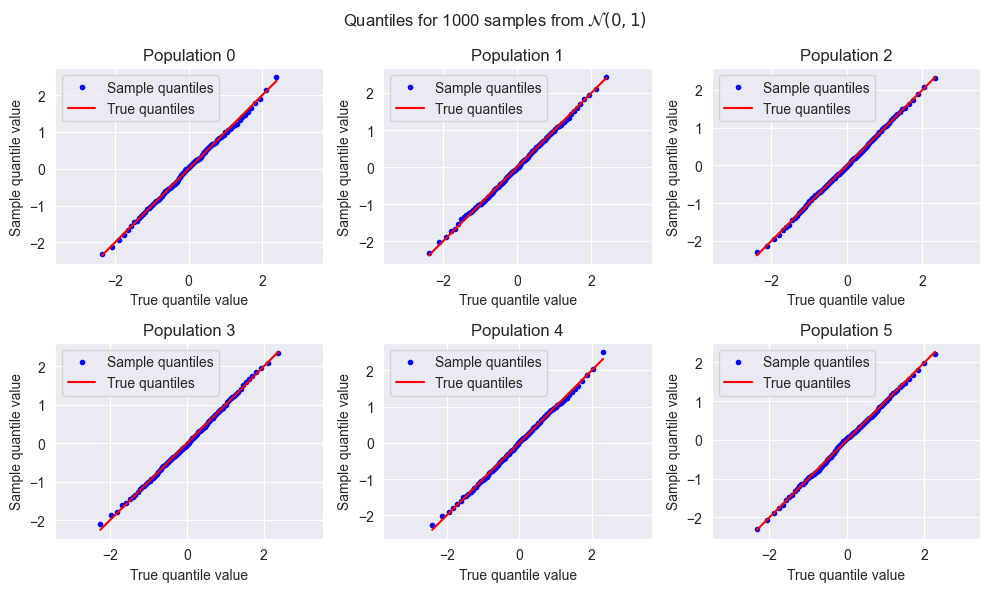

In [42]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle('Quantiles for 1000 samples from $\mathcal{N}(0, 1)$')
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    X = np.random.randn(1000)
    normplot(X, quantiles, f'Population {i}')
plt.tight_layout()

Now call `normplot` on a sample of 1,000
values from a uniform distribution. Explain qualitatively why it has the shape it does
(hint: think about the quantiles of the uniform and Normal distributions). Do this for
averages of uniform samples of different size (2, 3, 4, ...). Keep increasing sample size
until you cannot tell the resulting QQ plot from the QQ plots for samples from the
Normal distribution. Roughly how big does the sample have to be?

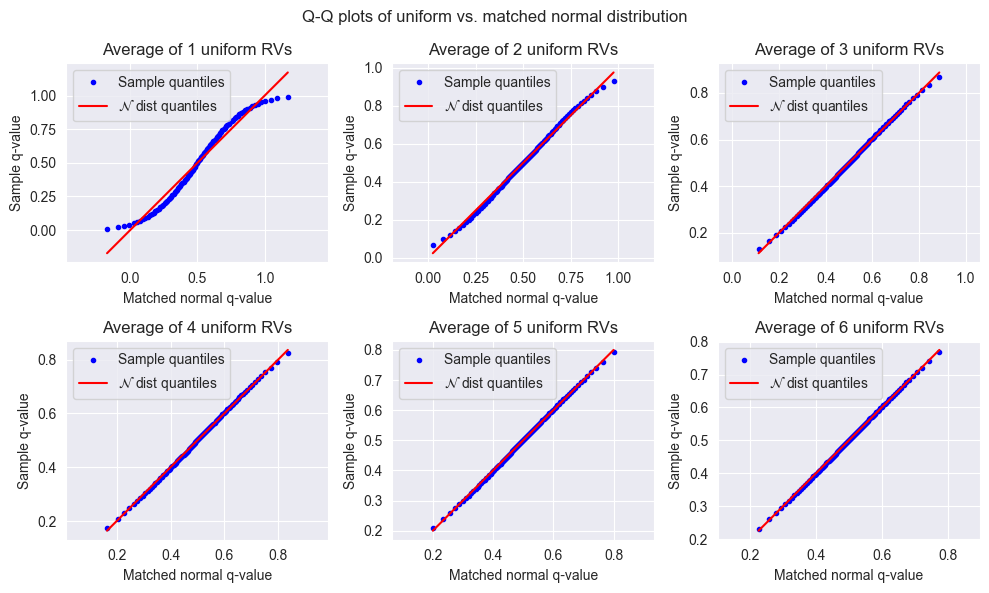

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle('Q-Q plots of uniform vs. matched normal distribution')
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    n = i + 1
    X = np.random.rand(1000000, n).mean(axis=1)
    normplot(X, quantiles, f'Average of {n} uniform RVs',
             xlabel='Matched normal q-value', ylabel='Sample q-value',
             linelabel='$\mathcal{N}$ dist quantiles')
plt.tight_layout()

The Q-Q plot for samples from a uniform distribution vs. a normal is **S-shaped**. The deviation is especially pronounced toward the extreme quantiles like 0.01 and 0.09. Here, values from the uniform distribution are clipped to be less extreme than the tails of the normal distribution, which may contain values of arbitrary size.

As we increase the number of summed uniform random variables, two things happen:
* The range of quantile values for the sum of RVs drops from [0.0, 1.0] to around [0.2, 0.8] as n increases from 1 to 6. This is because as uniform RVs are added, it becomes increasingly unlikely for their sum to lie near the extremes of the range (that requires all RVs to contribute samples from the same extreme). Intuitively consider die rolls: as the number of dice increases, the probability of "snake eyes" drops.
* The sum of RVs tends toward a normal distribution. To me it becomes indistinguishable once there are around **5 or 6 RVs** in the sum.